# 반갑습니다 13기 여러분

과제를 진행해 볼게요

혹시라도 도저히 모르겠거나 해결이 안되신다면 01040493041로 전화주시거나 카톡주세요!!

# ''' ? ''' 이 있는 부분을 채워주시면 됩니다

나는 내 스타일로 하겠다 하시면 그냥 구현 하셔도 됩니다!!

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

# 1) PCA의 과정을 한번 차근차근 밟아 볼거에요 잘 따라 오세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

#   기본 모듈들을 불러와 줍니다

In [2]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

#   설명변수 x1, x2, x3의 값이 이렇게 있네요

In [3]:
X = np.stack((x1,x2,x3),axis=0)

#   설명변수들을 하나의 행렬로 만들어 줍니다

In [4]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [5]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


1-1) 먼저 PCA를 시작하기 전에 항상!!!!!! 데이터를 scaling 해주어야 해요

https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ 를 참고하시면 도움이 될거에요

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit(X).transform(X)

In [7]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [8]:
features = X_std.T

In [9]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

1-2) 자 그럼 공분산 행렬을 구해볼게요\

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [10]:
cov_matrix = np.cov(features)

In [11]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-3) 이제 고유값과 고유벡터를 구해볼게요

방법은 실습코드에 있어요!!

In [12]:
eigenvalues = lin.eig(cov_matrix)[0]
eigenvectors = lin.eig(cov_matrix)[1]

In [13]:
print(eigenvalues)
print(eigenvectors)

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [14]:
mat = np.zeros((3,3))

In [15]:
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

In [17]:
mat

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

1-4) 자 이제 고유값 분해를 할 모든 준비가 되었어요 고유값 분해의 곱으로 원래 공분산 행렬을 구해보세요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해서 행렬 끼리 곱하시면 됩니다

행렬 곱으로 eigenvector x mat x eigenvector.T 하면 될거에요

In [18]:
np.dot(np.dot(eigenvectors,mat),eigenvectors.T)

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-5) 마지막으로 고유 벡터 축으로 값을 변환해 볼게요

함수로 한번 정의해 보았어요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [19]:
eigenvectors.shape[0]

3

In [20]:
eigenvectors.T[0]

array([ 0.47018528, -0.64960236, -0.59744671])

In [21]:
X_std.dot(eigenvectors.T[0])
# X_std n * 3 // eigenvectors 3*3 결과는 n * 3
# 첫 번째 고유벡터 방향으로 투영한 값 

array([ 0.31019368,  1.28092404,  1.38766381,  0.95087515,  1.84222365,
       -1.12563709, -2.71174416, -0.03100441,  2.29618509, -0.61585248,
       -1.73320252, -0.82366049,  0.75619512, -0.42344386, -0.39581307,
       -0.88581498,  0.24587691,  0.14741103, -0.7161265 ,  0.24475107])

In [22]:
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new,[X.dot(eigenvectors.T[i])]),axis=0)
    return new.T

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [23]:
new_coordinates(X_std,eigenvectors)
# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 2) PCA를 구현해 보세요

위의 과정을 이해하셨다면 충분히 하실 수 있을거에요

In [24]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    scaler = StandardScaler()
    x_std = scaler.fit(X).transform(X)
    features = x_std.T
    cov_matrix = np.cov(features)
    
    eigenvalues = lin.eig(cov_matrix)[0]
    eigenvectors = lin.eig(cov_matrix)[1]
    
    new_coordinates(x_std,eigenvectors)
    
    new_coordinate = new_coordinates(x_std,eigenvectors)
    
    index = eigenvalues.argsort()
    index = list(index)
    
    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T

In [25]:
MYPCA(X,3)
# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해볼까요?

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [27]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.explained_variance_ratio_
#제 1주성분이 설명하는 분산,... 

array([0.47106118, 0.29904546, 0.22989336])

In [29]:
pca.singular_values_
#이건 뭘까?

array([5.3163588 , 4.23588566, 3.71397385])

In [30]:
pca.get_precision()

array([[ 0.99066774,  0.17323696,  0.06223886],
       [ 0.17323696,  1.072166  , -0.29850147],
       [ 0.06223886, -0.29850147,  1.04578241]])

In [31]:
pca.get_covariance()
#이건 사용된 독립변수들의 공분산 행렬?

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

In [32]:
pca.fit_transform(X_std)
#transform 까지 적어주어야 변환을 하고 그 결과를 출력해줌.

array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111],
       [ 1.12563709, -0.52680338,  0.06564012],
       [ 2.71174416,  0.63290138,  0.71195473],
       [ 0.03100441, -0.20059783, -0.50339479],
       [-2.29618509,  0.07661447,  0.01087174],
       [ 0.61585248, -0.205764  ,  1.82651199],
       [ 1.73320252,  1.29971699,  0.09045178],
       [ 0.82366049, -0.57164535, -0.27123176],
       [-0.75619512,  0.73995175, -0.76710616],
       [ 0.42344386,  0.26555394, -1.41533681],
       [ 0.39581307, -1.64646874,  0.24104031],
       [ 0.88581498,  0.15195119, -0.82271209],
       [-0.24587691,  0.39139878, -1.15801831],
       [-0.14741103, -1.22874561, -0.03110396],
       [ 0.7161265 , -0.56781471, -0.86180345],
       [-0.24475107,  2.39442622,  1.19337361]])

In [33]:
MYPCA(X,3)
#pca클래스를 사용한 결과와 똑같다!

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 4) MNIST data에 적용을 해볼게요!

mnist data를 따로 내려받지 않게 압축파일에 같이 두었어요~!!!

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요~!!!

In [34]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# mnist 손글씨 데이터를 불러옵니다

In [35]:
mnist = io.loadmat('mnist-original.mat') 
X = mnist['data'].T
y = mnist['label'].T

In [36]:
# data information

# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [37]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y

In [39]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [40]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [9.],
       [9.],
       [9.]])

In [41]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# 지금까지 배운 여러 머신러닝 기법들이 있을거에요

4-1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주시고요

4-2) PCA를 이용하여 mnist data를 축소해서 학습을 해주세요 / test error가 제일 작으신 분께 상품을 드리겠습니다 ^0^

특정한 틀 없이 자유롭게 하시면 됩니다!!!!!!!!!

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [43]:
pca =  PCA() #n_components : 주성분 개수
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Step 1. 몇 개의 주성분을 선택할까?

#### 1. Scree plot으로 알아보기

In [44]:
sing_vals = range(pca.n_components_)
sing_vals

range(0, 784)

In [45]:
eigvals = pca.explained_variance_ratio_

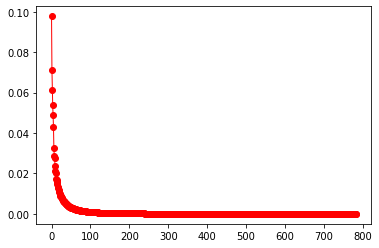

In [46]:
plt.plot(sing_vals, eigvals, 'ro-', linewidth=1)

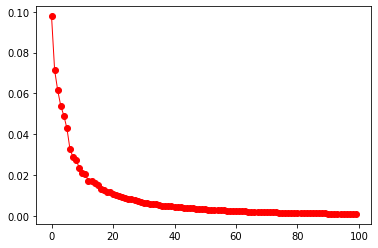

In [47]:
#너무 많아서 보기가 힘드니 100개로 줄여서 보기로 하였다.
pca =  PCA(n_components = 100) #n_components : 주성분 개수
pca.fit(X_train)
sing_vals = range(pca.n_components_)
eigvals = pca.explained_variance_ratio_
plt.plot(sing_vals, eigvals, 'ro-', linewidth=1)

스크리 플롯으로 보았을 때 20 ~ 40에 Elbow Point가 있다.

#### 2. 누적설명률로 골라보자

In [48]:
# 스크리 플롯을 바탕으로, 20에서 끊어내면 총 얼만큼의 변동을 설명할 수 있을까?
pca =  PCA(n_components = 20) #n_components : 주성분 개수
pca.fit(X_train)
eigvals = pca.explained_variance_ratio_
sum(eigvals)
#설명률이 64%밖에 안된다. 주성분 개수를 좀 더 늘려봐야겠다

0.6447511266753982

In [49]:
#30에서 끊어내면 총 얼만큼의 변동을 설명할 수 있을까?
pca =  PCA(n_components = 30)
pca.fit(X_train)
eigvals = pca.explained_variance_ratio_
sum(eigvals)

0.7316294365142527

In [50]:
#40에서 끊어내면 총 얼만큼의 변동을 설명할 수 있을까?
pca =  PCA(n_components = 40)
pca.fit(X_train)
eigvals = pca.explained_variance_ratio_
sum(eigvals)

0.7870419026728016

===> 주성분 개수 30 ~ 40개 일때 전체 데이터 분산의 70~80%를 설명한다.

#### 3. Kaiser's Rule (고유값 1이상의 주성분은 몇 개인지 알아보자)

In [51]:
pca =  PCA()
pca.fit(X_train)
eigvals = pca.explained_variance_

In [52]:
sum(eigvals >= 1)
# 1이상인 것들은 엄청 많다. 650개나 있다. 
# 태한이오빠에게 물어보니 이 데이터는 원래 그렇다고 한다. 
# 그러니 카이사 룰보다는 위에서 구한 것들을 바탕으로 주성분을 선택하자

650

# Step 2. Modeling
위의 결과를 바탕으로 주성분 개수는 30개일 때 40개일 때 두 개로 나누어 분석을 실시합니다.

## 2-1. Component 30-cut

## RandomForest

In [72]:
X_train_30 #주성분 30개 선택해서 만든 X_train

,Com1,Com2,Com3,Com4,Com5,Com6,Com7,Com8,Com9,Com10,...,Com21,Com22,Com23,Com24,Com25,Com26,Com27,Com28,Com29,Com30
0,-241.401991,273.953104,868.692070,-481.131177,-460.497659,64.873244,109.783332,135.444373,432.628999,-9.933314,...,-44.652165,-220.051528,265.052727,-106.590544,70.004746,119.752735,41.073423,21.025040,-32.711384,305.591231
1,-330.370704,-612.732093,386.073937,-231.343692,-185.075654,487.317855,280.298025,48.270838,-20.797023,-480.176604,...,178.700099,-145.303165,130.830925,18.605387,66.879865,155.471674,-171.076035,-275.288421,-148.406533,64.471091
2,-187.022039,-745.558162,291.990794,-300.326123,-261.682733,-135.614707,65.893117,52.328778,320.062774,-589.928552,...,316.437974,24.766145,-329.590719,-92.764300,-51.168476,-242.706402,177.934294,-101.492945,144.564830,-209.425290
3,666.090140,-645.507034,-175.316849,532.903514,186.392958,160.034157,-702.722187,0.622236,913.299807,-708.372067,...,-416.498576,282.060869,-52.709489,-392.488034,287.126675,-250.002248,-17.483804,60.595239,413.774061,-80.513751
4,-396.710534,-425.506796,-244.191298,-483.954170,212.053375,515.308769,803.904983,219.957663,-409.401774,-174.889158,...,-88.658554,111.841904,-50.724489,39.191503,130.719283,142.180054,209.543434,184.174078,-289.750657,-20.878277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,-409.882643,-398.597792,-25.972570,30.484170,528.856158,-259.396803,-666.106148,213.612587,36.163452,268.995341,...,-17.558752,226.521509,-80.537462,-252.573200,294.959060,-42.497125,46.591117,-267.023137,-133.799030,-205.161669
55996,-872.753566,550.881219,194.314486,323.976556,-150.053871,467.882412,-363.779260,-87.665511,245.214496,72.414959,...,-26.898416,131.463556,151.776731,-222.721401,148.044683,16.159897,-73.334711,88.618945,-31.860813,-158.190581
55997,43.366120,-801.137368,-208.526509,294.915846,112.406840,272.569302,-333.447407,33.630293,-38.603534,348.987278,...,143.081818,130.877267,-134.246522,252.089075,-364.182482,-89.512377,-234.000468,135.118128,-35.081348,-8.575964
55998,-908.035319,640.541665,120.002867,226.822940,-392.843456,162.583943,-80.981872,-105.590704,329.223355,54.138034,...,215.474739,83.369449,67.033928,-32.136813,4.383493,-100.846010,6.354600,-47.984702,-33.845198,-62.042049


In [73]:
X_test_30 #마찬가지로 위의 pca 모델로부터 transform해서 얻어낸 X_test

,Com1,Com2,Com3,Com4,Com5,Com6,Com7,Com8,Com9,Com10,...,Com21,Com22,Com23,Com24,Com25,Com26,Com27,Com28,Com29,Com30
0,-610.537110,81.876931,284.411784,-232.026138,-46.998164,119.210050,-81.359873,-143.691122,-85.864541,-187.383540,...,-218.026829,433.626157,71.331183,-30.606277,-133.857265,4.845708,-12.320946,-199.136564,-196.095380,324.535278
1,-251.099420,314.787337,574.729279,-596.500884,197.138371,24.661011,-272.418107,8.435356,65.415845,227.501592,...,-74.176836,25.445625,-64.648000,92.453836,147.161519,-112.590722,-107.455839,270.237072,484.322808,-11.678008
2,-111.885904,-732.534515,112.567919,-429.864723,-64.472595,-130.995114,-190.053446,-162.586762,-365.539066,-158.097826,...,150.323096,-22.030471,101.746015,-63.152657,-280.563670,-315.232175,2.477928,21.313074,169.598166,-154.893119
3,687.990155,62.173377,-324.350809,412.747990,107.190327,-681.679636,-35.000549,-78.866631,-199.094433,-391.926442,...,-18.966687,-355.458834,148.002258,8.379644,166.836369,-40.788025,205.780272,106.720206,-186.537967,-46.244790
4,533.371165,156.356114,479.663347,448.243658,102.094420,-81.115809,-162.333816,180.056697,-357.386795,-223.280220,...,-23.591634,-296.973129,84.106024,-432.967469,410.764617,153.137735,-42.482205,-4.450753,-280.549291,-161.227781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,219.426183,166.578395,328.058177,-880.729066,467.032973,85.923351,-118.565663,-432.991404,-188.602385,248.098892,...,238.501033,-101.641478,-352.866121,138.518869,138.621768,69.321068,207.486280,-363.074766,221.335096,-48.905011
13996,-320.287532,59.419531,677.406316,-194.872404,-393.176616,-119.924067,224.092092,304.392529,250.452424,-105.214473,...,-16.556647,-101.351083,-92.486575,-198.336558,-176.624162,266.376460,57.477672,89.036364,83.300858,103.573941
13997,-585.497240,98.056802,100.971779,-420.779864,-76.006778,-283.722151,251.587318,-637.118976,456.991636,208.192277,...,-10.309039,4.200654,500.723106,-102.087998,-67.033759,-184.583179,118.757492,-5.276139,54.926328,-42.875655
13998,918.001747,-401.794290,123.982547,1245.602098,872.748140,-6.691902,481.234541,-224.556773,230.539170,-234.965203,...,173.745494,55.314314,-270.701955,-140.460352,-297.777240,27.448666,-319.605931,-99.436022,186.127826,-75.137264


In [85]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=15, random_state=77)

In [86]:
forest.fit(X_train_30, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=77, verbose=0,
                       warm_start=False)

In [87]:
y_pred = forest.predict(X_test_30)
forest.score(X_test_30, y_test)

0.9345

In [93]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
metrics.accuracy_score(y_test, y_pred)

0.9345

# Component 40-cut

## RandomForest

In [107]:
forest = RandomForestClassifier()
forest.fit(X_train_40, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
y_pred = forest.predict(X_test_40)
forest.score(X_test_40, y_test)

0.954

In [115]:
metrics.confusion_matrix(y_test, y_pred)

array([[1289,    0,    2,    0,    2,    1,   11,    0,    2,    3],
       [   0, 1580,    9,    7,    2,    4,    1,    4,    1,    0],
       [  11,    3, 1365,   12,    5,    2,    5,   11,   19,    2],
       [   1,    1,   13, 1314,    0,   19,    4,   11,   24,   17],
       [   1,    3,    6,    2, 1348,    1,   11,    6,   10,   31],
       [   5,    0,    6,   21,    5, 1190,   12,    3,    5,    5],
       [   4,    2,    4,    2,    3,    7, 1371,    0,    1,    0],
       [   1,    7,   19,    1,   11,    2,    0, 1406,    1,   24],
       [   4,   11,   11,   29,    5,   22,    3,    6, 1250,   13],
       [   3,    6,    5,   21,   31,   10,    1,   25,    7, 1243]],
      dtype=int64)

## Catboost 

In [118]:
pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=c70470136bbad4b13b7cbedd3d70b552b08d25996e5e547f10d2689154364669
  Stored in directory: c:\users\강미경\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [122]:
from catboost import CatBoostClassifier

In [124]:
catb = CatBoostClassifier()
catb.fit(X_train_40, y_train)

0:	learn: 2.1982499	total: 269ms	remaining: 4m 28s
1:	learn: 2.1097940	total: 507ms	remaining: 4m 12s
2:	learn: 2.0357138	total: 747ms	remaining: 4m 8s
3:	learn: 1.9691766	total: 969ms	remaining: 4m 1s
4:	learn: 1.9106539	total: 1.18s	remaining: 3m 54s
5:	learn: 1.8551938	total: 1.39s	remaining: 3m 50s
6:	learn: 1.8052264	total: 1.62s	remaining: 3m 49s
7:	learn: 1.7605535	total: 1.85s	remaining: 3m 49s
8:	learn: 1.7156664	total: 2.07s	remaining: 3m 48s
9:	learn: 1.6764571	total: 2.3s	remaining: 3m 47s
10:	learn: 1.6406914	total: 2.53s	remaining: 3m 47s
11:	learn: 1.6070694	total: 2.76s	remaining: 3m 47s
12:	learn: 1.5742034	total: 2.99s	remaining: 3m 47s
13:	learn: 1.5433269	total: 3.21s	remaining: 3m 45s
14:	learn: 1.5134501	total: 3.42s	remaining: 3m 44s
15:	learn: 1.4845450	total: 3.65s	remaining: 3m 44s
16:	learn: 1.4576372	total: 3.87s	remaining: 3m 43s
17:	learn: 1.4330205	total: 4.06s	remaining: 3m 41s
18:	learn: 1.4082284	total: 4.28s	remaining: 3m 41s
19:	learn: 1.3860474	tota

In [132]:
y_pred = catb.predict(X_test_40)

In [134]:
metrics.confusion_matrix(y_test, y_pred)

array([[1288,    0,    3,    1,    2,    1,    8,    1,    4,    2],
       [   0, 1585,    7,    6,    3,    2,    1,    2,    1,    1],
       [  10,    4, 1362,   15,    8,    1,    6,   12,   17,    0],
       [   1,    3,   17, 1308,    0,   24,    3,   13,   22,   13],
       [   3,    4,    3,    1, 1349,    1,   12,    6,    9,   31],
       [   4,    1,    3,   22,    4, 1187,   17,    4,    7,    3],
       [   6,    2,    2,    1,    5,    9, 1366,    0,    3,    0],
       [   0,   10,   14,    1,    9,    2,    0, 1400,    1,   35],
       [   5,   10,   10,   15,    3,   17,    4,    6, 1275,    9],
       [   4,    5,    5,   20,   40,    5,    0,   28,   12, 1233]],
      dtype=int64)

In [135]:
metrics.accuracy_score(y_test, y_pred)

0.9537857142857142

### 캣 부스트도 소용이 없다. 다시 주성분 개수를 조절해보자. 

In [143]:
pca43 = PCA(n_components = 43)
X_train_43 = pd.DataFrame(pca43.fit_transform(X_train), columns = ["Com" + str(i) for i in range(1,44)])
X_test_43 = pd.DataFrame(pca43.transform(X_test), columns = ["Com" + str(i) for i in range(1,44)])

In [144]:
forest = RandomForestClassifier()
forest.fit(X_train_43, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
y_pred = forest.predict(X_test_43)
forest.score(X_test_43, y_test)

0.9535714285714286

### 47, 43으로 조절해보아도 크게 차이가 없다....  
인생이란 ...  